## [作業重點]
使用 Sklearn 中的 Lasso, Ridge 模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義。

機器學習的模型非常多種，但要訓練的資料多半有固定的格式，確保你了解訓練資料的格式為何，這樣在應用新模型時，就能夠最快的上手開始訓練！

## 練習時間
試著使用 sklearn datasets 的其他資料集 (boston, ...)，來訓練自己的線性迴歸模型，並加上適當的正則化來觀察訓練情形。

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# 讀取紅酒資料集
wine = datasets.load_wine()

# 先看一下裡面有什麼
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [3]:
# 先轉成熊貓的DataFarm 看一下內容
df_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)
# 把target加進去
df_wine['target'] = wine.target 
df_wine.head()

# 先看一下特徵

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


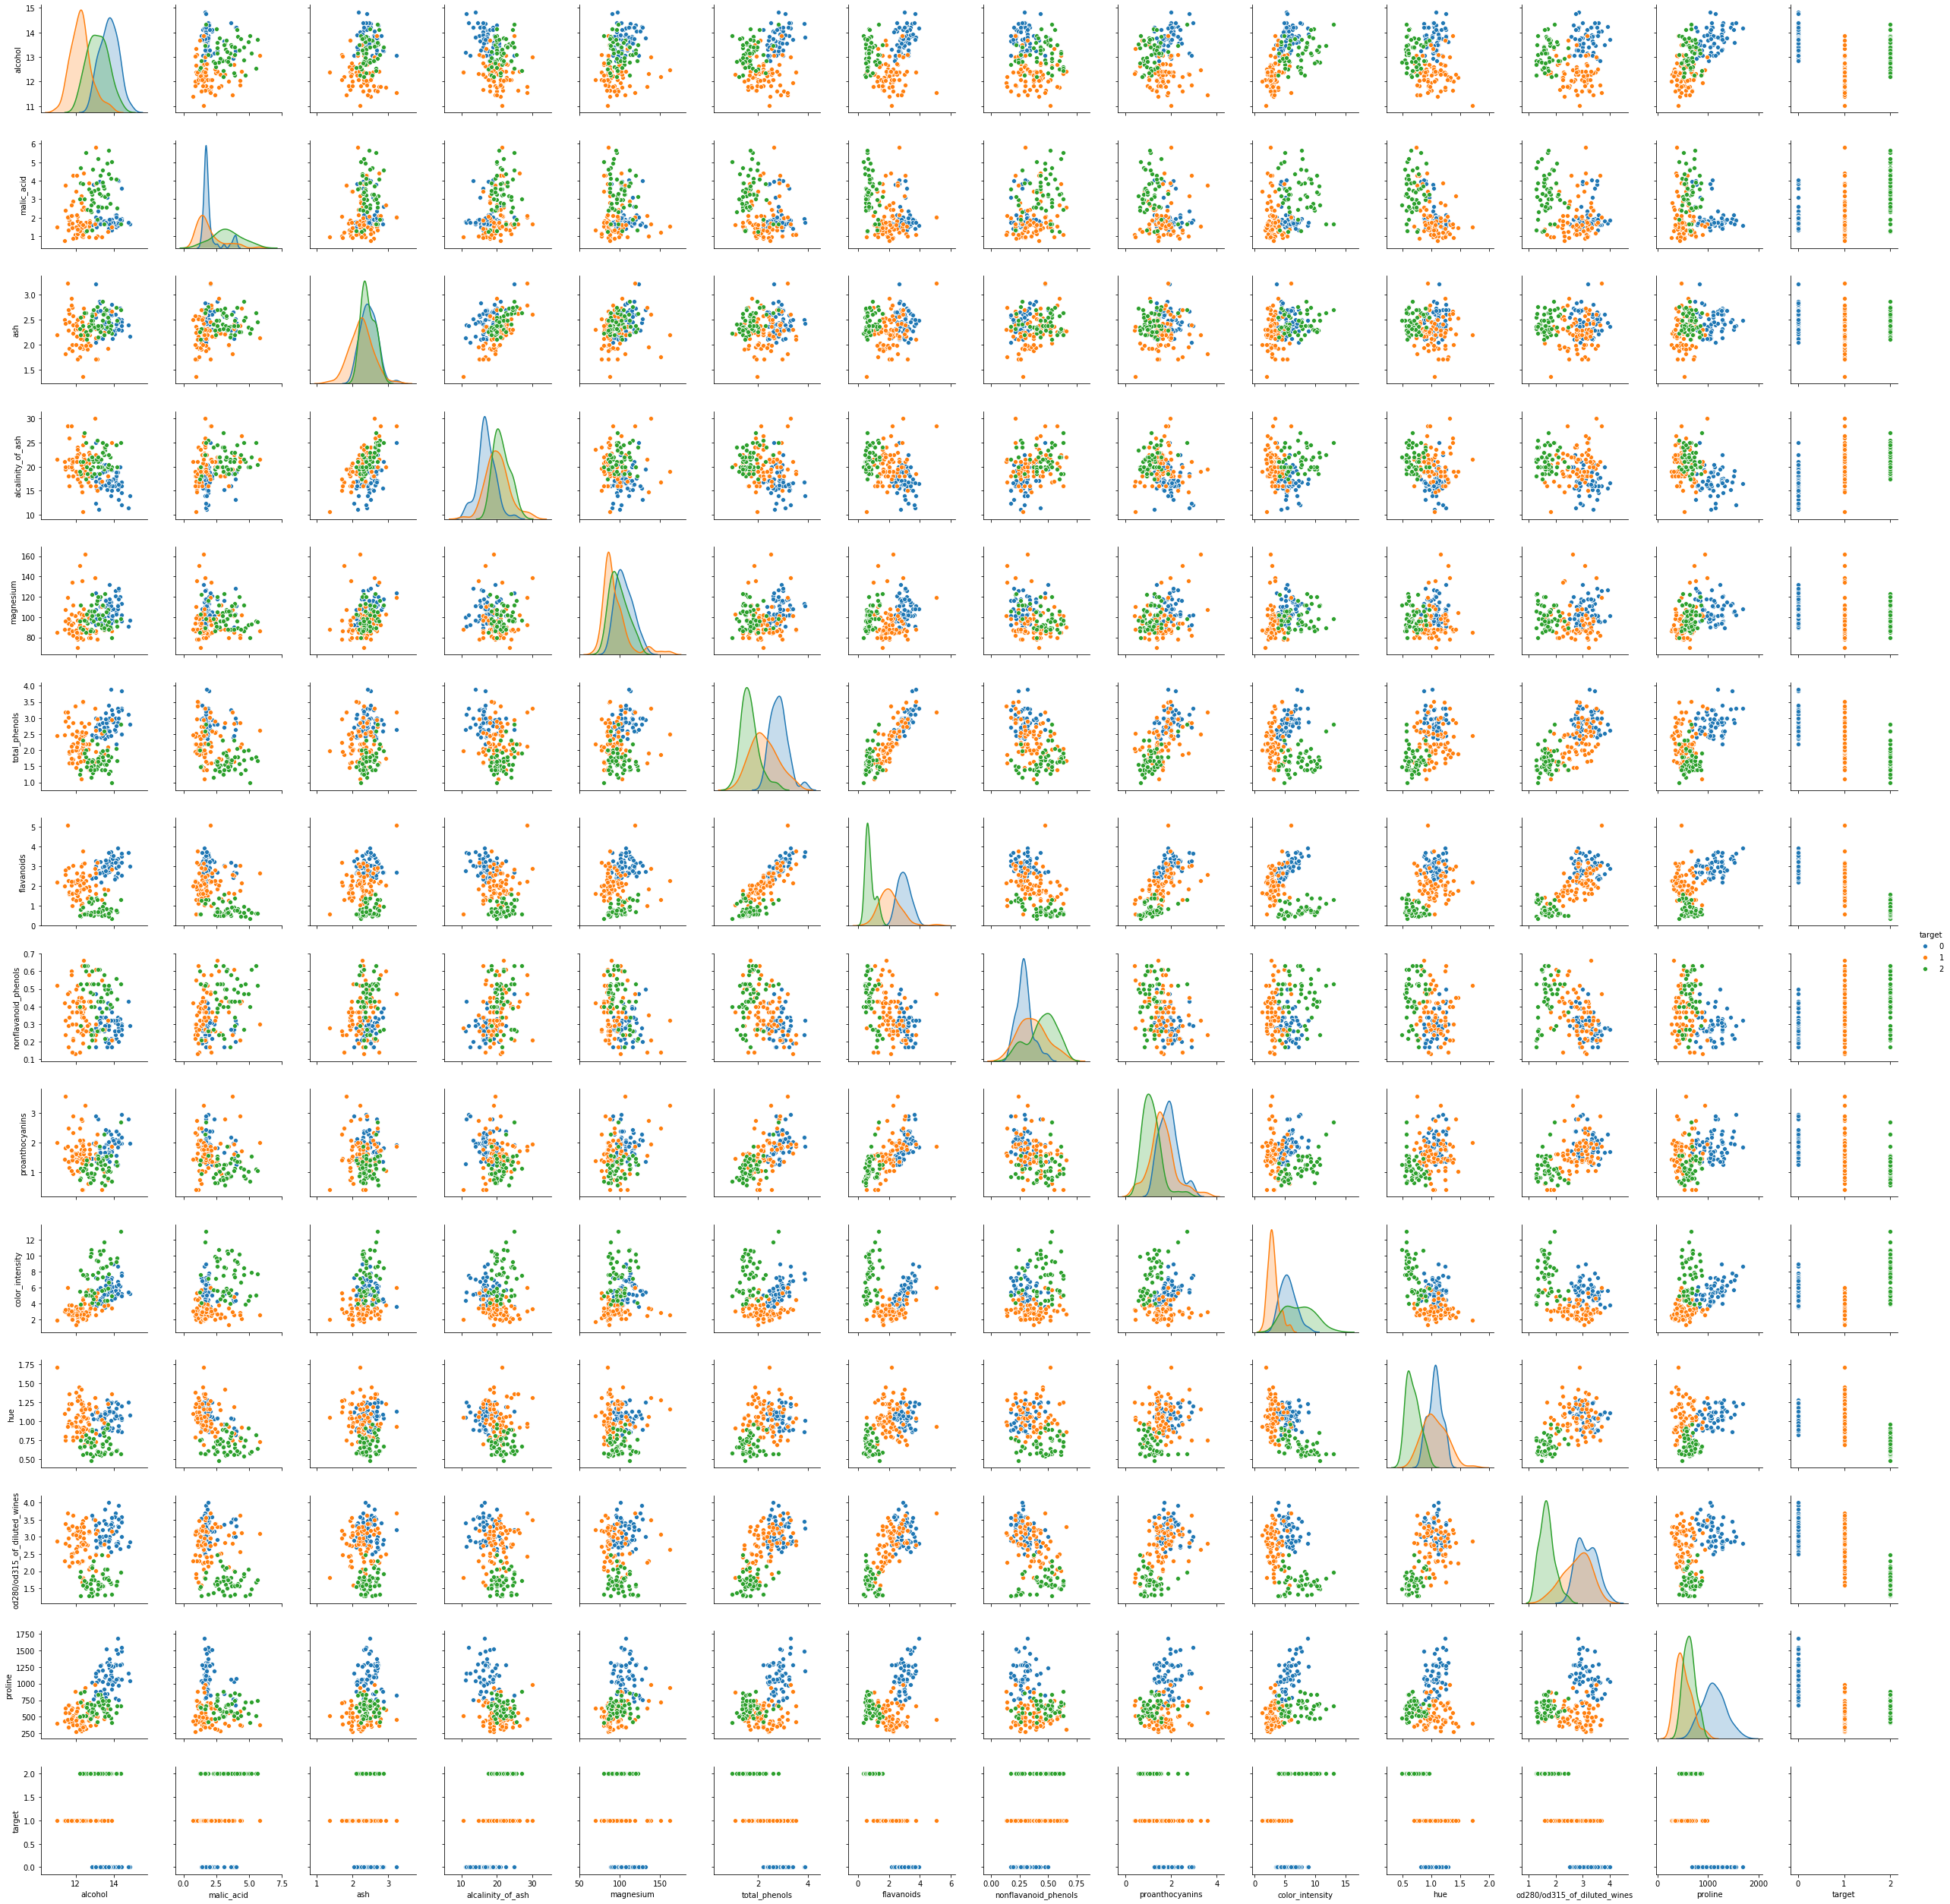

In [4]:
# 用 sns  看一下個項目之間的相關性和分布
sns.pairplot(df_wine, hue='target')
# 主要是因為target已經幫忙分類好成3個類別，所以不太知道這分類的基準

In [17]:
# 讀取紅酒資料集(再一次有被修改微和
wine = datasets.load_wine()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果(預測分類後的等級class.0,class.1,class.2)
y_pred = regr.predict(x_test)

In [18]:
# 印出 Linear Regression，明顯有某幾個相關係數特別小
print(regr.coef_)

[-1.09099883e-01  1.67405249e-02 -2.18753671e-01  4.66803998e-02
  3.20692287e-04  1.24491691e-01 -3.26192950e-01 -1.91327414e-01
  3.72016066e-02  7.57429505e-02 -1.55979636e-01 -2.85946973e-01
 -7.51809245e-04]


In [19]:
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 0.07


x size:(36, 13)	y size:(36,)


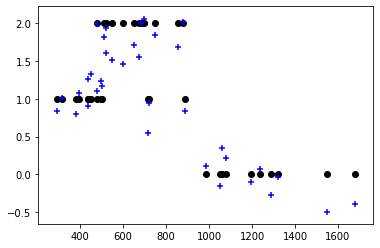

In [22]:
# 畫出回歸模型與實際資料的分佈
print("x size:{}\ty size:{}".format(x_test.shape,y_test.shape))
plt.scatter(x_test[:,12], y_test,  color='black')
plt.scatter(x_test[:,12], y_pred, color='blue', marker="+")
plt.show()

## LASSO

In [35]:
# 讀取紅酒資料集
wine = datasets.load_wine()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=4)

# 建立一個線性回歸模型
lasso = linear_model.Lasso(alpha=0.5)

# 將訓練資料丟進去模型訓練
lasso.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = lasso.predict(x_test)

In [36]:
# 印出各特徵對應的係數，可以看到許多係數都變成 0，Lasso Regression 的確可以做特徵選取
lasso.coef_

array([ 0.        ,  0.        ,  0.        ,  0.00301828,  0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.06074464,
       -0.        , -0.        , -0.00172235])

In [37]:
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 0.32


x size:(36, 13)	y size:(36,)


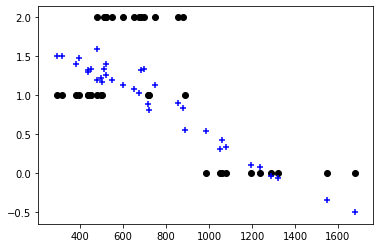

In [43]:
# 畫出回歸模型與實際資料的分佈
print("x size:{}\ty size:{}".format(x_test.shape,y_test.shape))
plt.scatter(x_test[:,12], y_test,  color='black')
plt.scatter(x_test[:,12], y_pred, color='blue', marker="+")
plt.show()

## Ridge

In [45]:
# 讀取紅酒資料集
wine = datasets.load_wine()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=4)

# 建立一個線性回歸模型
ridge = linear_model.Ridge(alpha=1.0)

# 將訓練資料丟進去模型訓練
ridge.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

In [46]:
# 印出 Ridge 的參數，可以很明顯看到比起 Linear Regression，參數的數值都明顯小了許多
print(ridge.coef_)

[-0.1060308   0.01767173 -0.20185208  0.04519307  0.00041456  0.09901609
 -0.31237143 -0.1038379   0.03489971  0.07770768 -0.13450626 -0.27442063
 -0.00077001]


In [47]:
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 0.07


x size:(36, 13)	y size:(36,)


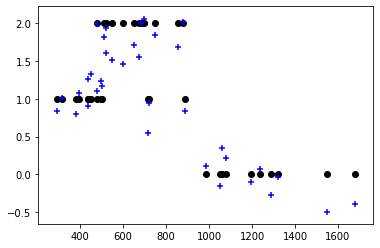

In [48]:
# 畫出回歸模型與實際資料的分佈
print("x size:{}\ty size:{}".format(x_test.shape,y_test.shape))
plt.scatter(x_test[:,12], y_test,  color='black')
plt.scatter(x_test[:,12], y_pred, color='blue', marker="+")
plt.show()